In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_circles
from sklearn.metrics import mean_squared_error

In [16]:
# Just data generation nothing else
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data 
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

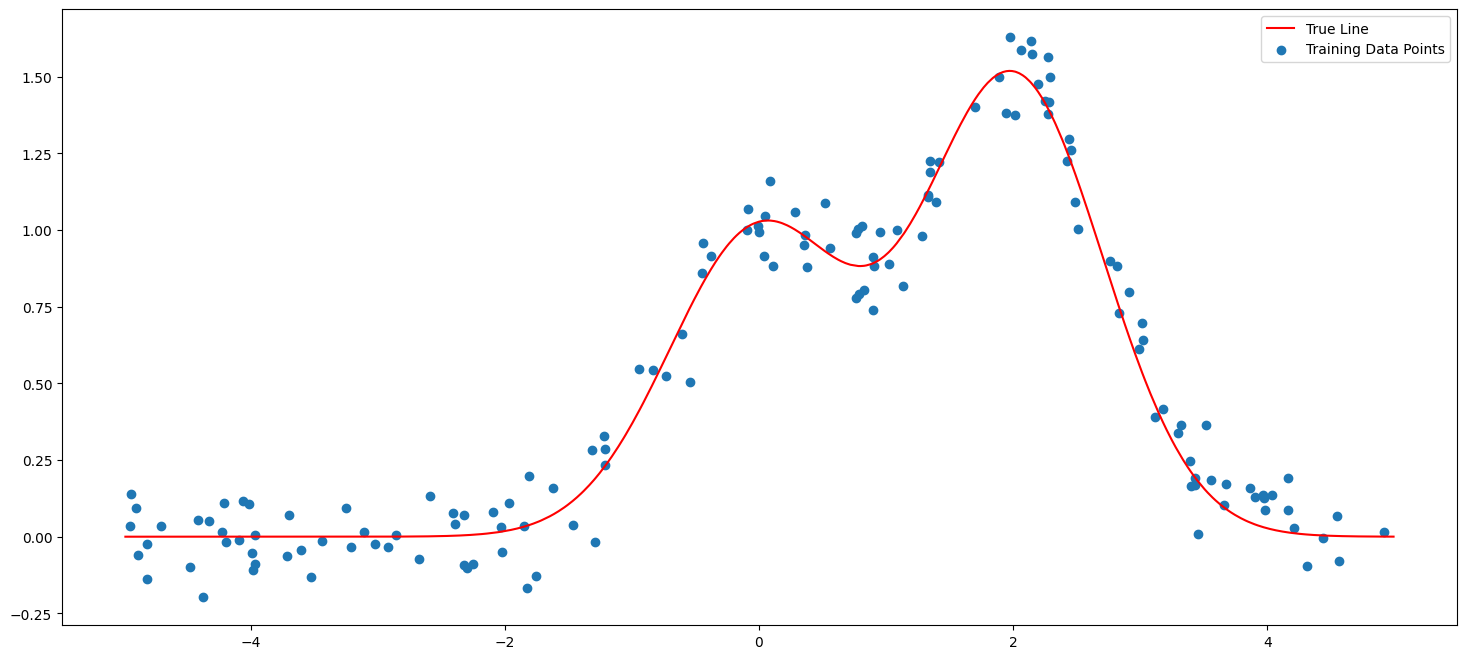

In [17]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r", label = 'True Line')
plt.scatter(X_train, y_train, label='Training Data Points')
plt.legend()
plt.show()

## Decision Tree Regressor

In [18]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
y_pred = dtree.predict(X_test)

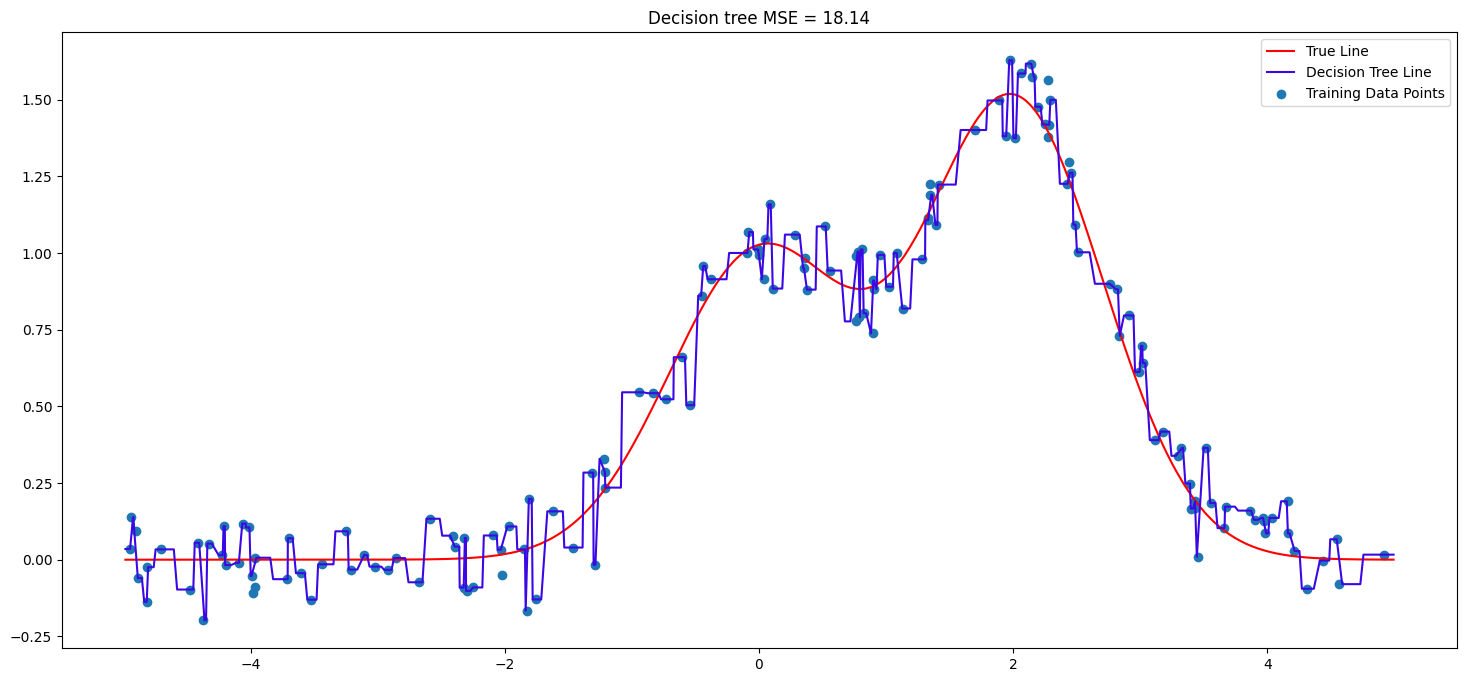

In [20]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r", label = 'True Line')
plt.plot(X_test, dtree.predict(X_test), '#3B07E5', label='Decision Tree Line')
plt.scatter(X_train, y_train, label='Training Data Points')
plt.title("Decision tree MSE = %.2f" 
          % np.sum((y_test - y_pred) ** 2))
plt.legend()
plt.show()

## Random Forest Regression

In [21]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [22]:
y_pred = rf.predict(X_test)

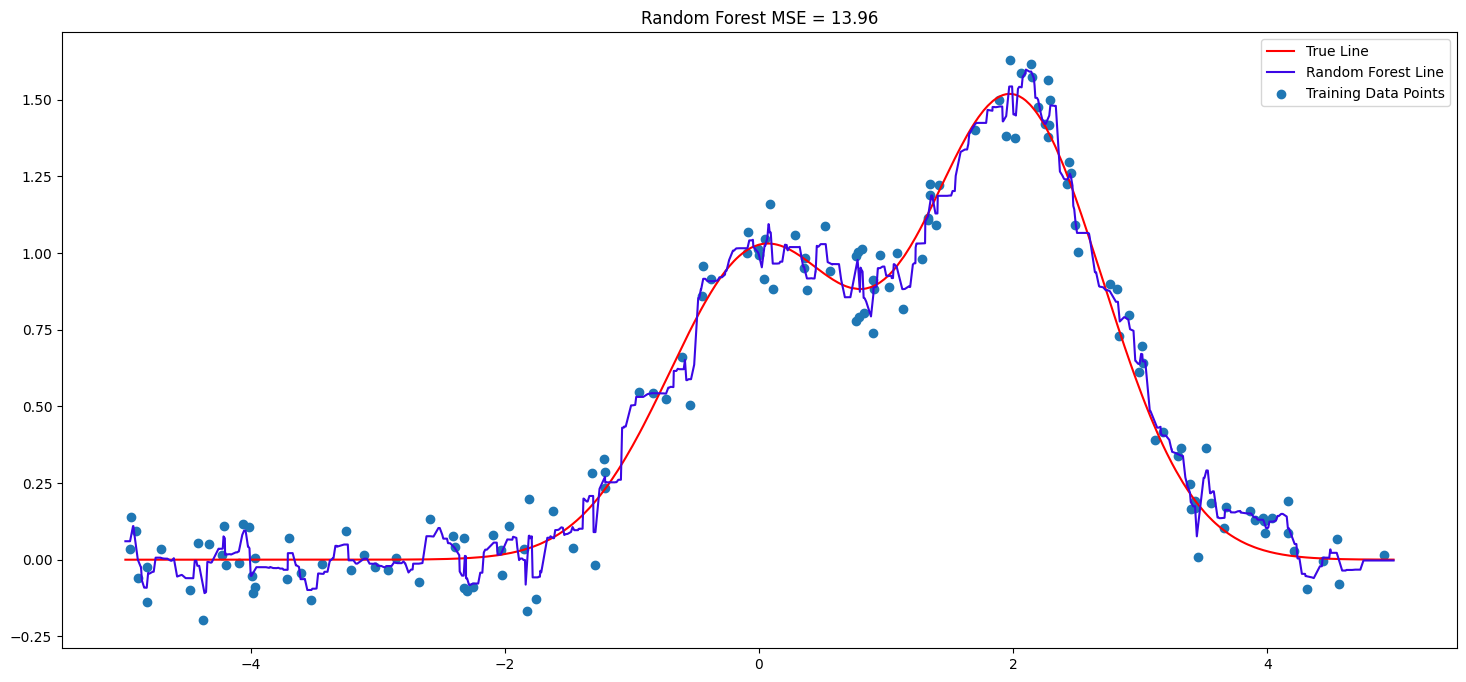

In [23]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r", label = 'True Line')
plt.plot(X_test, rf.predict(X_test), '#3B07E5', label='Random Forest Line')
plt.scatter(X_train, y_train, label='Training Data Points')
plt.title("Random Forest MSE = %.2f" 
          % np.sum((y_test - y_pred) ** 2))
plt.legend()
plt.show()

**The decision tree likely overfits the data — it memorizes the training set and gives higher MSE (18) on test data. The random forest, by combining multiple trees, reduces overfitting and achieves a lower test MSE (13), meaning it predicts more accurately.**